In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 4]

In [11]:
#local only

class fake_args():
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

        
# args = fake_args(data_path='../data_unzip/', 
#                  task='3A', 
#                  batch_size=100,
#                  epochs=10,
#                  lr_gan=1e-3,
#                  lr_clf=1e-3,
#                  gap=2,
#                  lbl_percentage=0.2,
#                  num_per_class=-1,
#                  seed=0,
#                  save_path='../train_related/JDA_GAN',
#                  model_save_period=1,
#                  classifier='/Users/stevenliu/time-series-adaption/time-series-domain-adaptation/JDA/FNN_trained_model'
#                  )


args = fake_args(data_path='/home/weixinli/',
                  task='3E',
                  batch_size=100,
                  epochs=800,
                  gap=4,
                  lbl_percentage=1,
                  num_per_class=10,
                  seed=0,
                  classifier='/home/weixinli/time-series-domain-adaptation/JDA/FNN_trained_model')
if args.seed is None:
    args.seed = random.randint(1, 10000)
np.random.seed(args.seed)

args.task = '3Av2' if args.task == '3A' else '3E'
d_out = 50 if args.task == "3Av2" else 65
if args.num_per_class == -1:
    args.num_per_class = math.ceil(args.batch_size / d_out)
    
model_sub_folder = '/task_%s_gap_%s_lblPer_%1.1f_numPerClass_%i'%(task, gap, lbl_percentage, num_per_class)

In [61]:
task = '3E'
gap = 4
num_per_class = 10
file_path = '/home/weixinli/time-series-domain-adaptation/train_related/JDA_GAN1'
combine_acces_ = []
for lbl_percentage in [0,0.2,0.5,0.7,1]:
    model_sub_folder = '/task_%s_gap_%s_lblPer_%1.1f_numPerClass_%i'%(task, gap, lbl_percentage, num_per_class)
    unlabel_acces = np.load(file_path+model_sub_folder+'/unlabel_acces.npy')
    unlabel_losses = np.load(file_path+model_sub_folder+'/unlabel_losses.npy')
    label_acces = np.load(file_path+model_sub_folder+'/label_acces.npy')
    label_losses = np.load(file_path+model_sub_folder+'/label_losses.npy')
    combine_acces = np.load(file_path+model_sub_folder+'/combine_acces.npy')
    combine_losses = np.load(file_path+model_sub_folder+'/combine_losses.npy')
    combine_acces_.append(combine_acces)
    print(np.max(combine_acces), combine_acces[-1])
    


0.023570924488355682 0.015384615384615385
0.023351648351648352 0.01607142857142857
0.02219419924337957 0.015384615384615385
0.023135642982971227 0.015149735760422783
0.024205128205128205 0.015384615384615385


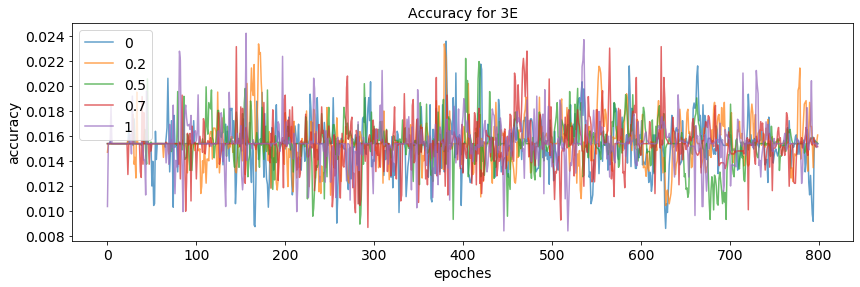

In [64]:
plt.plot(combine_acces_[0], alpha=0.7, label='0')
plt.plot(combine_acces_[1], alpha=0.7, label='0.2')
plt.plot(combine_acces_[2], alpha=0.7, label='0.5')
plt.plot(combine_acces_[3], alpha=0.7, label='0.7')
plt.plot(combine_acces_[4], alpha=0.7, label='1')
plt.legend(fontsize=14)
plt.xlabel('epoches', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.yticks(fontsize=14)
plt.title('Accuracy for 3E',fontsize=14)
plt.show()